### Importing Modules

In [1]:
#Call all the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string
from datetime import date, timedelta   
import nltk
from sqlalchemy import create_engine
import sqlite3
%matplotlib inline

### 1. Data Ghathring

In [2]:
# Itreate using for loop to gather the data from data set
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [210501, 210508, 210515,210529,210605,210612,210619,210626,210703,210710,210717,210724,210731]
df = get_data(week_nums)

### 2. Data Exploring

In [3]:
#Display the first five rows of data frame
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,7561288,2582898
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,04:00:00,REGULAR,7561295,2582903
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,08:00:00,REGULAR,7561302,2582918
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,12:00:00,REGULAR,7561336,2582977
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,16:00:00,REGULAR,7561426,2583008


In [4]:
#Display the last five rows of data frame
df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
209458,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/30/2021,05:00:00,REGULAR,5554,589
209459,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/30/2021,09:00:00,REGULAR,5554,589
209460,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/30/2021,13:00:00,REGULAR,5554,589
209461,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/30/2021,17:00:00,REGULAR,5554,590
209462,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/30/2021,21:00:00,REGULAR,5554,591


In [5]:
#Display the information of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2721477 entries, 0 to 209462
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [6]:
#Display the statistical information about data frme
df.describe()

,ENTRIES,EXITS
count,2.721477e+06,2.721477e+06
mean,4.187829e+07,3.352181e+07
std,2.189091e+08,1.927547e+08
min,0.000000e+00,0.000000e+00
25%,2.168880e+05,9.585300e+04
50%,1.419220e+06,8.587600e+05
75%,6.049660e+06,3.980241e+06
max,2.147430e+09,2.122941e+09


In [7]:
# Display the size of data frame
df.shape

(2721477, 11)

In [8]:
# Display type of each column in data frame
df.dtypes

C/A                                                                     object
UNIT                                                                    object
SCP                                                                     object
STATION                                                                 object
LINENAME                                                                object
DIVISION                                                                object
DATE                                                                    object
TIME                                                                    object
DESC                                                                    object
ENTRIES                                                                  int64
EXITS                                                                    int64
dtype: object

In [9]:
#Display names of columns in the data frame
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [10]:
#Display mean of number of entries
df['ENTRIES'].mean()

41878285.77447871

In [11]:
# Display standerd divation of number of exits
df['EXITS                                                               '].std()

192754726.63691953

In [12]:
# Display median of number of entries
df['ENTRIES'].median()

1419220.0

In [13]:
# Display number of values for each station
df['STATION'].value_counts()

34 ST-PENN STA     55619
FULTON ST          52376
GRD CNTRL-42 ST    48482
23 ST              39852
86 ST              35390
                   ...  
ALABAMA AV          1628
182-183 STS         1627
ORCHARD BEACH       1613
SUTTER AV           1092
CLEVELAND ST        1090
Name: STATION, Length: 379, dtype: int64

In [14]:
# Display number of values for each time
df['TIME'].value_counts()

08:00:00    232912
12:00:00    232912
00:00:00    232900
16:00:00    232900
04:00:00    232863
             ...  
06:03:07         1
08:07:20         1
09:11:18         1
12:53:56         1
04:49:05         1
Name: TIME, Length: 54464, dtype: int64

In [15]:
# Display number of values for each date order by the earliest date
df['DATE'].value_counts().sort_index()

04/24/2021    29924
04/25/2021    29844
04/26/2021    29803
04/27/2021    29973
04/28/2021    29817
              ...  
07/26/2021    29816
07/27/2021    29928
07/28/2021    29923
07/29/2021    30016
07/30/2021    30061
Name: DATE, Length: 91, dtype: int64

In [16]:
# Display number of values for each unit
df['UNIT'].value_counts()

R549    37157
R057    27852
R014    27263
R540    25953
R029    25516
        ...  
R433     1628
R237     1627
R459     1613
R349     1092
R435     1090
Name: UNIT, Length: 469, dtype: int64

In [17]:
# Display number of values for each division
df['DIVISION'].value_counts()

IRT    978201
IND    949508
BMT    602095
PTH    168776
SRT     17461
RIT      5436
Name: DIVISION, dtype: int64

In [18]:
# Display number of values for each data description
df['DESC'].value_counts()

REGULAR       2709955
RECOVR AUD      11522
Name: DESC, dtype: int64

In [19]:
# Display number of values for each subunit_channel_position
df['SCP'].value_counts()

00-00-00    252686
00-00-01    250981
00-00-02    223093
00-00-03    112618
00-03-00     99010
             ...  
03-00-08         6
01-02-08         5
00-B8-02         1
01-00-10         1
01-00-11         1
Name: SCP, Length: 227, dtype: int64

In [20]:
# Display size of data frame grouped by division and stations
df.groupby(['DIVISION', 'STATION']).size()

DIVISION  STATION        
BMT       1 AV               13092
          104 ST              2188
          111 ST              2166
          121 ST              3234
          14 ST-UNION SQ     14739
                             ...  
PTH       TWENTY THIRD ST     4633
RIT       RIT-MANHATTAN       2164
          RIT-ROOSEVELT       3272
SRT       ST. GEORGE         13639
          TOMPKINSVILLE       3822
Length: 449, dtype: int64

### 3. Data Cleaning

In [21]:
# Display the info of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2721477 entries, 0 to 209462
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [22]:
# Remove all the spaces from columns names
df.columns=[column.strip()for column in df.columns]

In [23]:
# Display the info of data frame after removing spaces
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2721477 entries, 0 to 209462
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 249.2+ MB


#### Rename columns

In [24]:
# Rename the columns
df.rename({'C/A': 'control_area', 'UNIT': 'unit','SCP':'subunit_channel_position','STATION':'station','LINENAME':'line_name','DIVISION':'division','DATE':'date','TIME':'time','DESC':'description','ENTRIES':'entries','EXITS':'exits'}, axis=1,inplace=True)

In [25]:
# Display the info of data frame after renaming columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2721477 entries, 0 to 209462
Data columns (total 11 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   control_area              object
 1   unit                      object
 2   subunit_channel_position  object
 3   station                   object
 4   line_name                 object
 5   division                  object
 6   date                      object
 7   time                      object
 8   description               object
 9   entries                   int64 
 10  exits                     int64 
dtypes: int64(2), object(9)
memory usage: 249.2+ MB


In [26]:
# The number of rows
df.shape[0]

2721477

In [27]:
# Check the null values
df.isna().sum()

control_area                0
unit                        0
subunit_channel_position    0
station                     0
line_name                   0
division                    0
date                        0
time                        0
description                 0
entries                     0
exits                       0
dtype: int64

#### No null values

In [28]:
# Remove the duplicate 
# The duplicate values are RECOVR AUD
df =df[df['description'] != 'RECOVR AUD' ]

#### Drop duplicate

In [29]:
# Removing duplicate 
df.drop_duplicates(inplace=True)

In [30]:
# Check that the description is only REGULAR
df['description'].value_counts()

REGULAR    2709955
Name: description, dtype: int64

In [31]:
# Display the number of values of each description
df.description.value_counts()

REGULAR    2709955
Name: description, dtype: int64

In [32]:
# Add new column date_time contains the date and time in %m/%d/%Y %H:%M:%S format
df["date_time"] = pd.to_datetime(df.date + " " + df.time, 
                                            format="%m/%d/%Y %H:%M:%S")

In [33]:
#Check that there is no duplicate 
# No duplicate whene all the entries are ones
(df
 .groupby(["control_area", "unit", "subunit_channel_position", "station", "date_time"])
 .entries.count()
 .reset_index()
 .sort_values("entries", ascending=False)).head(5)


,control_area,unit,subunit_channel_position,station,date_time,entries
0,A002,R051,02-00-00,59 ST,2021-04-24 00:00:00,1
1806631,R138,R293,00-03-02,34 ST-PENN STA,2021-06-03 22:00:00,1
1806633,R138,R293,00-03-02,34 ST-PENN STA,2021-06-04 06:00:00,1
1806634,R138,R293,00-03-02,34 ST-PENN STA,2021-06-04 10:00:00,1
1806635,R138,R293,00-03-02,34 ST-PENN STA,2021-06-04 10:28:37,1


#### No more duplicate

In [34]:
# Display information of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2709955 entries, 0 to 209462
Data columns (total 12 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   control_area              object        
 1   unit                      object        
 2   subunit_channel_position  object        
 3   station                   object        
 4   line_name                 object        
 5   division                  object        
 6   date                      object        
 7   time                      object        
 8   description               object        
 9   entries                   int64         
 10  exits                     int64         
 11  date_time                 datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 268.8+ MB


In [35]:
# Display the first five rows after the initial cleaning
df.head()

,control_area,unit,subunit_channel_position,station,line_name,division,date,time,description,entries,exits,date_time
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,7561288,2582898,2021-04-24 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,04:00:00,REGULAR,7561295,2582903,2021-04-24 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,08:00:00,REGULAR,7561302,2582918,2021-04-24 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,12:00:00,REGULAR,7561336,2582977,2021-04-24 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,16:00:00,REGULAR,7561426,2583008,2021-04-24 16:00:00


#### Make a turnstile dataframe

In [36]:
# Creat turnstiles_daily_entries data frame 
turnstiles_daily_entries = (df
                        .groupby(["control_area", "unit", "subunit_channel_position", "station", "date"],as_index=False)
                        .entries.first())

In [37]:
# Display the first five rows
turnstiles_daily_entries.head()

,control_area,unit,subunit_channel_position,station,date,entries
0,A002,R051,02-00-00,59 ST,04/24/2021,7561288
1,A002,R051,02-00-00,59 ST,04/25/2021,7561638
2,A002,R051,02-00-00,59 ST,04/26/2021,7561870
3,A002,R051,02-00-00,59 ST,04/27/2021,7562365
4,A002,R051,02-00-00,59 ST,04/28/2021,7562953


#### Adding a new columns in turnstile dataframe

In [38]:
# Adding two columns to turnstiles_daily_entries data frame
turnstiles_daily_entries[["pre_entries_date", "pre_entries"]] = (turnstiles_daily_entries
                                                       .groupby(["control_area", "unit", "subunit_channel_position", "station"])["date", "entries"]
                                                       .apply(lambda grp: grp.shift(1)))
#apply the shift function by 1

<ipython-input-38-f55a47d44da0>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily_entries[["pre_entries_date", "pre_entries"]] = (turnstiles_daily_entries


In [39]:
# Adding column diff_entries 
turnstiles_daily_entries["diff_entries"] = (turnstiles_daily_entries
                                                       .groupby(["control_area", "unit", "subunit_channel_position", "station"])["entries"]
                                                       .apply(lambda x: x.diff()))

In [40]:
# Display the first five rows of turnstiles_daily_entries data frame
turnstiles_daily_entries.head()

,control_area,unit,subunit_channel_position,station,date,entries,pre_entries_date,pre_entries,diff_entries
0,A002,R051,02-00-00,59 ST,04/24/2021,7561288,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,04/25/2021,7561638,04/24/2021,7561288.0,350.0
2,A002,R051,02-00-00,59 ST,04/26/2021,7561870,04/25/2021,7561638.0,232.0
3,A002,R051,02-00-00,59 ST,04/27/2021,7562365,04/26/2021,7561870.0,495.0
4,A002,R051,02-00-00,59 ST,04/28/2021,7562953,04/27/2021,7562365.0,588.0


In [41]:
# Display the last five rows of turnstiles_daily_entries data frame
turnstiles_daily_entries.tail()

,control_area,unit,subunit_channel_position,station,date,entries,pre_entries_date,pre_entries,diff_entries
454074,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/26/2021,5554,07/25/2021,5554.0,0.0
454075,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/27/2021,5554,07/26/2021,5554.0,0.0
454076,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/28/2021,5554,07/27/2021,5554.0,0.0
454077,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/29/2021,5554,07/28/2021,5554.0,0.0
454078,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/30/2021,5554,07/29/2021,5554.0,0.0


In [42]:
# Drop the rows for the earliest date in the df
turnstiles_daily_entries.dropna(subset=["pre_entries_date",'pre_entries'], axis=0, inplace=True)

In [43]:
# Check there is no null value in data frame
turnstiles_daily_entries.isna().sum()

control_area                0
unit                        0
subunit_channel_position    0
station                     0
date                        0
entries                     0
pre_entries_date            0
pre_entries                 0
diff_entries                0
dtype: int64

In [44]:
# Check if entries less than the previos entries
turnstiles_daily_entries[turnstiles_daily_entries["entries"] < turnstiles_daily_entries["pre_entries"]]

,control_area,unit,subunit_channel_position,station,date,entries,pre_entries_date,pre_entries,diff_entries
3550,A011,R080,01-03-00,57 ST-7 AV,04/25/2021,885609559,04/24/2021,8.856097e+08,-166.0
3551,A011,R080,01-03-00,57 ST-7 AV,04/26/2021,885609408,04/25/2021,8.856096e+08,-151.0
3552,A011,R080,01-03-00,57 ST-7 AV,04/27/2021,885609207,04/26/2021,8.856094e+08,-201.0
3553,A011,R080,01-03-00,57 ST-7 AV,04/28/2021,885608991,04/27/2021,8.856092e+08,-216.0
3554,A011,R080,01-03-00,57 ST-7 AV,04/29/2021,885608748,04/28/2021,8.856090e+08,-243.0
...,...,...,...,...,...,...,...,...,...
450259,R730,R431,00-00-04,EASTCHSTER/DYRE,07/27/2021,1559803712,07/26/2021,1.559804e+09,-158.0
450260,R730,R431,00-00-04,EASTCHSTER/DYRE,07/28/2021,1559803547,07/27/2021,1.559804e+09,-165.0
450261,R730,R431,00-00-04,EASTCHSTER/DYRE,07/29/2021,1559803380,07/28/2021,1.559804e+09,-167.0
450262,R730,R431,00-00-04,EASTCHSTER/DYRE,07/30/2021,1559803230,07/29/2021,1.559803e+09,-150.0


In [45]:
# The number of the verification condtion for each station
turnstiles_daily_entries["station"][turnstiles_daily_entries["entries"] < turnstiles_daily_entries["pre_entries"]].value_counts()

42 ST-PORT AUTH    271
DEKALB AV          268
BAY PKWY           180
14 ST              180
GRD CNTRL-42 ST    160
                  ... 
82 ST-JACKSON H      1
40 ST LOWERY ST      1
WHITEHALL S-FRY      1
116 ST               1
JKSN HT-ROOSVLT      1
Name: station, Length: 115, dtype: int64

In [46]:
turnstiles_daily_entries[turnstiles_daily_entries["entries"] < turnstiles_daily_entries["pre_entries"]].head()

,control_area,unit,subunit_channel_position,station,date,entries,pre_entries_date,pre_entries,diff_entries
3550,A011,R080,01-03-00,57 ST-7 AV,04/25/2021,885609559,04/24/2021,885609725.0,-166.0
3551,A011,R080,01-03-00,57 ST-7 AV,04/26/2021,885609408,04/25/2021,885609559.0,-151.0
3552,A011,R080,01-03-00,57 ST-7 AV,04/27/2021,885609207,04/26/2021,885609408.0,-201.0
3553,A011,R080,01-03-00,57 ST-7 AV,04/28/2021,885608991,04/27/2021,885609207.0,-216.0
3554,A011,R080,01-03-00,57 ST-7 AV,04/29/2021,885608748,04/28/2021,885608991.0,-243.0


In [47]:
# If the condtion is true grouped by turnstile and station
(turnstiles_daily_entries[turnstiles_daily_entries["entries"] < turnstiles_daily_entries["pre_entries"]]
    .groupby(["control_area", "unit", "subunit_channel_position", "station"])
    .size())

control_area  unit  subunit_channel_position  station        
A011          R080  01-03-00                  57 ST-7 AV         90
                    01-03-03                  57 ST-7 AV          1
                    01-03-04                  57 ST-7 AV          1
A013          R081  01-06-01                  49 ST               2
A014          R081  02-00-00                  49 ST               1
                                                                 ..
R612          R057  01-05-00                  ATL AV-BARCLAY      1
R617          R058  00-00-02                  BERGEN ST           1
R622          R123  00-00-00                  FRANKLIN AV        90
R730          R431  00-00-04                  EASTCHSTER/DYRE    88
TRAM2         R469  00-05-00                  RIT-ROOSEVELT       1
Length: 214, dtype: int64

#### Fixing the order problem

In [48]:
# Ensure there is no negative data
def get_daily_counts(row,max_counter):
    counter=row['entries'] - row['pre_entries']
    if counter<0:
        counter= - counter
    if counter >max_counter:
        print(row['entries'],row['pre_entries'])
        return 0
    return counter

x = turnstiles_daily_entries.apply(get_daily_counts ,axis=1,max_counter=1000000)


3091 1390173.0
1308 4340554.0
14 1028362.0
327680 756269765.0
193 8049630.0
0 5309746.0
16 2651099.0
30 2627867.0
200 1605012.0
6006 4298763.0
237 8882974.0
132 4454753.0
189 7643368.0
328039 7577096.0
238 4780275.0
4 1534984195.0
67109632 14.0
327682 67109640.0
67109632 1.0
15 67109632.0
12517625 94.0
95 5405384.0
687970645 19471254.0
30 7489966.0
16777220 1037158.0
271 6101347.0
4825276 12538332.0
12539185 4825276.0
181 1657902.0
231 2524688.0
262156 2393343.0
67437911 375578.0
20 4070949.0
35 58304767.0
5430 2341294.0
2 33030303.0
572 5198164.0
111 2320052.0
302 1953511.0
90 4788199.0
393412 104110962.0
118 909043446.0
406 4470923.0
197281 1891026.0
196879 3277263.0
87 303654987.0
11 3145365.0
35 10736984.0
146668937 1123536132.0
1191142633 12133821.0
1441860 12919099.0
13943214 8899046.0
69 4183423.0
199 1653251.0
432 11851565.0
24 1925928.0
327683 50346231.0
14455033 262146.0
0 14455033.0


In [49]:
def get_daily_counts(row, max_counter):
    counter = row["entries"] - row["pre_entries"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["entries"], row["pre_entries"])
        counter = min(row["entries"], row["pre_entries"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily_entries["daily_entries"] = turnstiles_daily_entries.apply(get_daily_counts, axis=1, max_counter=1000000)

3091 1390173.0
1308 4340554.0
14 1028362.0
327680 756269765.0
193 8049630.0
0 5309746.0
16 2651099.0
30 2627867.0
200 1605012.0
6006 4298763.0
237 8882974.0
132 4454753.0
189 7643368.0
328039 7577096.0
238 4780275.0
4 1534984195.0
67109632 14.0
327682 67109640.0
67109632 1.0
15 67109632.0
12517625 94.0
95 5405384.0
687970645 19471254.0
30 7489966.0
16777220 1037158.0
271 6101347.0
4825276 12538332.0
12539185 4825276.0
181 1657902.0
231 2524688.0
262156 2393343.0
67437911 375578.0
20 4070949.0
35 58304767.0
5430 2341294.0
2 33030303.0
572 5198164.0
111 2320052.0
302 1953511.0
90 4788199.0
393412 104110962.0
118 909043446.0
406 4470923.0
197281 1891026.0
196879 3277263.0
87 303654987.0
11 3145365.0
35 10736984.0
146668937 1123536132.0
1191142633 12133821.0
1441860 12919099.0
13943214 8899046.0
69 4183423.0
199 1653251.0
432 11851565.0
24 1925928.0
327683 50346231.0
14455033 262146.0
0 14455033.0


In [50]:
# Display the first four rows of data frame
turnstiles_daily_entries.head(4)

,control_area,unit,subunit_channel_position,station,date,entries,pre_entries_date,pre_entries,diff_entries,daily_entries
1,A002,R051,02-00-00,59 ST,04/25/2021,7561638,04/24/2021,7561288.0,350.0,350.0
2,A002,R051,02-00-00,59 ST,04/26/2021,7561870,04/25/2021,7561638.0,232.0,232.0
3,A002,R051,02-00-00,59 ST,04/27/2021,7562365,04/26/2021,7561870.0,495.0,495.0
4,A002,R051,02-00-00,59 ST,04/28/2021,7562953,04/27/2021,7562365.0,588.0,588.0


In [51]:
# Creat a new data frame contains control_area, unit, station, date ,daily_entries
control_area_unit_station_daily = turnstiles_daily_entries.groupby(["control_area", "unit", "station", "date"])[['daily_entries']].sum().reset_index()
control_area_unit_station_daily.head()

,control_area,unit,station,date,daily_entries
0,A002,R051,59 ST,04/25/2021,3054.0
1,A002,R051,59 ST,04/26/2021,1872.0
2,A002,R051,59 ST,04/27/2021,4578.0
3,A002,R051,59 ST,04/28/2021,4827.0
4,A002,R051,59 ST,04/29/2021,4864.0


In [52]:
# Creat a new data frame contains station, date ,daily_entries
station_daily_entries = turnstiles_daily_entries.groupby(["station", "date"])[['daily_entries']].sum().reset_index()
station_daily_entries.head()

,station,date,daily_entries
0,1 AV,04/25/2021,6588.0
1,1 AV,04/26/2021,4071.0
2,1 AV,04/27/2021,6767.0
3,1 AV,04/28/2021,6998.0
4,1 AV,04/29/2021,7224.0


In [53]:
station_totals_entries=station_daily_entries.groupby('station').sum().sort_values('daily_entries', ascending=False).reset_index()
station_totals_entries

,station,daily_entries
0,34 ST-PENN STA,4799084.0
1,FULTON ST,4168143.0
2,PATH NEW WTC,3847055.0
3,34 ST-HERALD SQ,3762874.0
4,86 ST,3649763.0
...,...,...
374,TOMPKINSVILLE,26775.0
375,BEACH 98 ST,16321.0
376,BEACH 105 ST,11025.0
377,BROAD CHANNEL,10812.0


#### The busiest station is 34 ST-PENN STA

In [54]:
# Display the unique number of stations
len(df.station.unique())

379

In [55]:
df['time_str'] = df['time'].str[:2]
#Only the hours

In [56]:
df['date_str'] = df['date'].str[:2]
#Only the months

In [57]:
# Create data frame for exits called stations_daily_entries
stations_daily_entries = \
(turnstiles_daily_entries.groupby(['station','date'])['daily_entries'].sum()
                 .reset_index())  

stations_daily_entries.head()

,station,date,daily_entries
0,1 AV,04/25/2021,6588.0
1,1 AV,04/26/2021,4071.0
2,1 AV,04/27/2021,6767.0
3,1 AV,04/28/2021,6998.0
4,1 AV,04/29/2021,7224.0


In [58]:
# Creat turnstiles_daily_exits data frame
turnstiles_daily_exits = (df
                        .groupby(["control_area", "unit", "subunit_channel_position", "station", "date"],as_index=False)
                        .exits.first())

In [59]:
# Display the fisrt five rows
turnstiles_daily_exits.head()

,control_area,unit,subunit_channel_position,station,date,exits
0,A002,R051,02-00-00,59 ST,04/24/2021,2582898
1,A002,R051,02-00-00,59 ST,04/25/2021,2583044
2,A002,R051,02-00-00,59 ST,04/26/2021,2583139
3,A002,R051,02-00-00,59 ST,04/27/2021,2583341
4,A002,R051,02-00-00,59 ST,04/28/2021,2583548


In [60]:
# Adding two columns to turnstiles_daily_exits data frame
turnstiles_daily_exits[["pre_exits_date", "pre_exits"]] = (turnstiles_daily_exits
                                                       .groupby(["control_area", "unit", "subunit_channel_position", "station"])["date", "exits"]
                                                       .apply(lambda grp: grp.shift(1)))
#apply the shift function by 1

<ipython-input-60-9ea67ebf051b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily_exits[["pre_exits_date", "pre_exits"]] = (turnstiles_daily_exits


In [61]:
# Adding new columns to turnstiles_daily_exits data frame
turnstiles_daily_exits["diff_exits"] = (turnstiles_daily_exits
                                                       .groupby(["control_area", "unit", "subunit_channel_position", "station"])["exits"]
                                                       .apply(lambda x: x.diff()))

In [62]:
# Display the first five rows 
turnstiles_daily_exits.head()

,control_area,unit,subunit_channel_position,station,date,exits,pre_exits_date,pre_exits,diff_exits
0,A002,R051,02-00-00,59 ST,04/24/2021,2582898,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,04/25/2021,2583044,04/24/2021,2582898.0,146.0
2,A002,R051,02-00-00,59 ST,04/26/2021,2583139,04/25/2021,2583044.0,95.0
3,A002,R051,02-00-00,59 ST,04/27/2021,2583341,04/26/2021,2583139.0,202.0
4,A002,R051,02-00-00,59 ST,04/28/2021,2583548,04/27/2021,2583341.0,207.0


In [63]:
# Display the last five rows 
turnstiles_daily_exits.tail()

,control_area,unit,subunit_channel_position,station,date,exits,pre_exits_date,pre_exits,diff_exits
454074,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/26/2021,588,07/25/2021,588.0,0.0
454075,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/27/2021,588,07/26/2021,588.0,0.0
454076,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/28/2021,589,07/27/2021,588.0,1.0
454077,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/29/2021,589,07/28/2021,589.0,0.0
454078,TRAM2,R469,00-05-01,RIT-ROOSEVELT,07/30/2021,589,07/29/2021,589.0,0.0


In [64]:
# Drop the rows for the earliest date in the df
turnstiles_daily_exits.dropna(subset=["pre_exits_date",'pre_exits'], axis=0, inplace=True)

In [65]:
# Check ther is no null values
turnstiles_daily_exits.isna().sum()

control_area                0
unit                        0
subunit_channel_position    0
station                     0
date                        0
exits                       0
pre_exits_date              0
pre_exits                   0
diff_exits                  0
dtype: int64

In [66]:
# Check if exits less than the previos exits
turnstiles_daily_exits[turnstiles_daily_exits["exits"] < turnstiles_daily_exits["pre_exits"]]

,control_area,unit,subunit_channel_position,station,date,exits,pre_exits_date,pre_exits,diff_exits
3550,A011,R080,01-03-00,57 ST-7 AV,04/25/2021,489610575,04/24/2021,4.896115e+08,-914.0
3551,A011,R080,01-03-00,57 ST-7 AV,04/26/2021,489609947,04/25/2021,4.896106e+08,-628.0
3552,A011,R080,01-03-00,57 ST-7 AV,04/27/2021,489608977,04/26/2021,4.896099e+08,-970.0
3553,A011,R080,01-03-00,57 ST-7 AV,04/28/2021,489607914,04/27/2021,4.896090e+08,-1063.0
3554,A011,R080,01-03-00,57 ST-7 AV,04/29/2021,489606918,04/28/2021,4.896079e+08,-996.0
...,...,...,...,...,...,...,...,...,...
437527,R622,R123,00-00-00,FRANKLIN AV,07/29/2021,2061990317,07/28/2021,2.061991e+09,-575.0
437528,R622,R123,00-00-00,FRANKLIN AV,07/30/2021,2061989834,07/29/2021,2.061990e+09,-483.0
449525,R728,R226,00-05-01,GUN HILL RD,07/21/2021,1,07/20/2021,2.300000e+01,-22.0
453920,TRAM2,R469,00-05-00,RIT-ROOSEVELT,05/22/2021,0,05/14/2021,6.200000e+01,-62.0


In [67]:
# The number of the verification condtion for each station
turnstiles_daily_exits["station"][turnstiles_daily_exits["exits"] < turnstiles_daily_exits["pre_exits"]].value_counts()

ELMHURST AV        181
161/YANKEE STAD    181
14 ST              180
34 ST-PENN STA      93
50 ST               92
                  ... 
82 ST-JACKSON H      1
B'WAY-LAFAYETTE      1
WHITEHALL S-FRY      1
116 ST               1
JKSN HT-ROOSVLT      1
Name: station, Length: 108, dtype: int64

In [68]:
turnstiles_daily_exits[turnstiles_daily_exits["exits"] < turnstiles_daily_exits["pre_exits"]].head()

,control_area,unit,subunit_channel_position,station,date,exits,pre_exits_date,pre_exits,diff_exits
3550,A011,R080,01-03-00,57 ST-7 AV,04/25/2021,489610575,04/24/2021,489611489.0,-914.0
3551,A011,R080,01-03-00,57 ST-7 AV,04/26/2021,489609947,04/25/2021,489610575.0,-628.0
3552,A011,R080,01-03-00,57 ST-7 AV,04/27/2021,489608977,04/26/2021,489609947.0,-970.0
3553,A011,R080,01-03-00,57 ST-7 AV,04/28/2021,489607914,04/27/2021,489608977.0,-1063.0
3554,A011,R080,01-03-00,57 ST-7 AV,04/29/2021,489606918,04/28/2021,489607914.0,-996.0


In [69]:
# If the condtion is true grouped by turnstile and station
(turnstiles_daily_exits[turnstiles_daily_exits["exits"] < turnstiles_daily_exits["pre_exits"]]
    .groupby(["control_area", "unit", "subunit_channel_position", "station"])
    .size())

control_area  unit  subunit_channel_position  station       
A011          R080  01-03-00                  57 ST-7 AV        90
                    01-03-03                  57 ST-7 AV         1
                    01-03-04                  57 ST-7 AV         1
A013          R081  01-06-01                  49 ST              2
A014          R081  02-00-00                  49 ST              1
                                                                ..
R612          R057  01-05-00                  ATL AV-BARCLAY     1
R617          R058  00-00-02                  BERGEN ST          1
R622          R123  00-00-00                  FRANKLIN AV       90
R728          R226  00-05-01                  GUN HILL RD        1
TRAM2         R469  00-05-00                  RIT-ROOSEVELT      2
Length: 195, dtype: int64

In [70]:
# Ensure there is no negative values
def get_daily_counts(row,max_counter):
    counter=row['exits'] - row['pre_exits']
    if counter<0:
        counter= - counter
    if counter >max_counter:
        print(row['exits'],row['pre_exits'])
        return 0
    return counter

x = turnstiles_daily_exits.apply(get_daily_counts ,axis=1,max_counter=1000000)


222 1653813.0
143 436767822.0
63 2357391.0
0 3196184.0
11 2192436.0
7 1025488.0
103 2944258.0
597 1150648.0
800988285 4318015.0
4318173 800988285.0
171 2774456.0
66 6592853.0
128 2004689.0
155 8071002.0
236 563806220.0
14090624 195.0
132 1851757.0
1174467742 4612025.0
4 1671513.0
234 3349789.0
5534671 12055807.0
12057050 5534671.0
442 1102852.0
573 2809267.0
347 6525614.0
40 3077781.0
12 5011803.0
48 11489540.0
0 654311429.0
0 1240819.0
85 2974419.0
1434 4034842.0
11 1005893.0
441 6668164.0
651 1332485.0
63 2607641.0
70 68794149.0
46 1875746154.0
897 1958224.0
369 1885963.0
327 236191318.0
16813995 71289.0
139 1758519.0
175519871 1980415156.0
1140892720 4482586.0
137 9252098.0
6714703 2117913.0
242 10879659.0
581 11825796.0
0 134263112.0
3980632 0.0
0 3980632.0


In [71]:
def get_daily_counts(row, max_counter):
    counter = row["exits"] - row["pre_exits"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["exits"], row["pre_exits"])
        counter = min(row["exits"], row["pre_exits"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily_exits["daily_exits"] = turnstiles_daily_exits.apply(get_daily_counts, axis=1, max_counter=1000000)

222 1653813.0
143 436767822.0
63 2357391.0
0 3196184.0
11 2192436.0
7 1025488.0
103 2944258.0
597 1150648.0
800988285 4318015.0
4318173 800988285.0
171 2774456.0
66 6592853.0
128 2004689.0
155 8071002.0
236 563806220.0
14090624 195.0
132 1851757.0
1174467742 4612025.0
4 1671513.0
234 3349789.0
5534671 12055807.0
12057050 5534671.0
442 1102852.0
573 2809267.0
347 6525614.0
40 3077781.0
12 5011803.0
48 11489540.0
0 654311429.0
0 1240819.0
85 2974419.0
1434 4034842.0
11 1005893.0
441 6668164.0
651 1332485.0
63 2607641.0
70 68794149.0
46 1875746154.0
897 1958224.0
369 1885963.0
327 236191318.0
16813995 71289.0
139 1758519.0
175519871 1980415156.0
1140892720 4482586.0
137 9252098.0
6714703 2117913.0
242 10879659.0
581 11825796.0
0 134263112.0
3980632 0.0
0 3980632.0


In [72]:
# Dispaly the first five rows
turnstiles_daily_exits.head(4)

,control_area,unit,subunit_channel_position,station,date,exits,pre_exits_date,pre_exits,diff_exits,daily_exits
1,A002,R051,02-00-00,59 ST,04/25/2021,2583044,04/24/2021,2582898.0,146.0,146.0
2,A002,R051,02-00-00,59 ST,04/26/2021,2583139,04/25/2021,2583044.0,95.0,95.0
3,A002,R051,02-00-00,59 ST,04/27/2021,2583341,04/26/2021,2583139.0,202.0,202.0
4,A002,R051,02-00-00,59 ST,04/28/2021,2583548,04/27/2021,2583341.0,207.0,207.0


In [73]:
# Creat a new data frame contains station, date ,daily_exits
station_daily_exits = turnstiles_daily_exits.groupby(["station", "date"])[['daily_exits']].sum().reset_index()
station_daily_exits.head()

,station,date,daily_exits
0,1 AV,04/25/2021,12549.0
1,1 AV,04/26/2021,7424.0
2,1 AV,04/27/2021,10788.0
3,1 AV,04/28/2021,11618.0
4,1 AV,04/29/2021,11955.0


In [74]:
# Creat a new data frame contains  station ,daily_exits
station_totals_exits=station_daily_exits.groupby('station').sum().sort_values('daily_exits', ascending=False).reset_index()
station_totals_exits

,station,daily_exits
0,34 ST-PENN STA,5815669.0
1,34 ST-HERALD SQ,4636252.0
2,14 ST-UNION SQ,4416989.0
3,86 ST,4261175.0
4,PATH NEW WTC,4258296.0
...,...,...
374,RIT-ROOSEVELT,5153.0
375,RIT-MANHATTAN,4470.0
376,ORCHARD BEACH,200.0
377,ST. GEORGE,45.0


In [75]:
# Creat a new data frame contains  station ,date ,daily_exits
stations_daily = \
(turnstiles_daily_exits.groupby(['station','date'])['daily_exits'].sum()
                 .reset_index())  

stations_daily.head()

,station,date,daily_exits
0,1 AV,04/25/2021,12549.0
1,1 AV,04/26/2021,7424.0
2,1 AV,04/27/2021,10788.0
3,1 AV,04/28/2021,11618.0
4,1 AV,04/29/2021,11955.0


In [76]:
# Add the traffic column
df['traffic']=(turnstiles_daily_entries['daily_entries']+turnstiles_daily_exits['daily_exits'])

In [77]:
# Display the first five rows of the orignal data frame
df.head(5)

,control_area,unit,subunit_channel_position,station,line_name,division,date,time,description,entries,exits,date_time,time_str,date_str,traffic
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,7561288,2582898,2021-04-24 00:00:00,00,04,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,04:00:00,REGULAR,7561295,2582903,2021-04-24 04:00:00,04,04,496.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,08:00:00,REGULAR,7561302,2582918,2021-04-24 08:00:00,08,04,327.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,12:00:00,REGULAR,7561336,2582977,2021-04-24 12:00:00,12,04,697.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,16:00:00,REGULAR,7561426,2583008,2021-04-24 16:00:00,16,04,795.0


In [78]:
# Creat new data frame of the top 5 station of traffic
top5_stations=(df.groupby(['station'])['traffic'].sum()
                   .reset_index()
                   .sort_values(by='traffic',ascending=False) 
                   .station.head(5))
top5_stations

173           CANAL ST
226          FULTON ST
59     34 ST-HERALD SQ
61      34 ST-PENN STA
110              86 ST
Name: station, dtype: object

In [79]:
# Sort data frame by traffic number in ascending
top5_stations=df[df['station'].isin(top5_stations)].sort_values(by='traffic',ascending=False)
top5_stations.head()

,control_area,unit,subunit_channel_position,station,line_name,division,date,time,description,entries,exits,date_time,time_str,date_str,traffic
3931,A025,R023,01-06-02,34 ST-HERALD SQ,BDFMNQRW,BMT,07/19/2021,20:00:00,REGULAR,570161,202271,2021-07-19 20:00:00,20,07,998387.0
3931,A025,R023,01-06-02,34 ST-HERALD SQ,BDFMNQRW,BMT,07/03/2021,04:00:00,REGULAR,567868,197505,2021-07-03 04:00:00,04,07,998387.0
3931,A025,R023,01-06-02,34 ST-HERALD SQ,BDFMNQRW,BMT,05/05/2021,12:00:00,REGULAR,558096,183385,2021-05-05 12:00:00,12,05,998387.0
3931,A025,R023,01-06-02,34 ST-HERALD SQ,BDFMNQRW,BMT,06/02/2021,08:00:00,REGULAR,562700,189515,2021-06-02 08:00:00,08,06,998387.0
3931,A025,R023,01-06-02,34 ST-HERALD SQ,BDFMNQRW,BMT,06/16/2021,20:00:00,REGULAR,565129,193126,2021-06-16 20:00:00,20,06,998387.0


In [80]:
# The repeated date for the busiest station
b=top5_stations.groupby(top5_stations['station']=="34 STPENNSTA")['date_str'].value_counts(sort=False)

In [81]:
# Creat new data frame of the top 10 station of daily_entries
top10_stations = (station_totals_entries.groupby(['station'])['daily_entries'].sum()
                   .reset_index()
                   .sort_values(by='daily_entries',ascending=False) 
                   .station.head(10))

top10_stations

61      34 ST-PENN STA
226          FULTON ST
315       PATH NEW WTC
59     34 ST-HERALD SQ
110              86 ST
46               23 ST
52               28 ST
233    GRD CNTRL-42 ST
68     42 ST-PORT AUTH
9               125 ST
Name: station, dtype: object

In [82]:
# Creat new data frame of the top 10 station of daily_exits
top10_stations = (station_totals_exits.groupby(['station'])['daily_exits'].sum()
                   .reset_index()
                   .sort_values(by='daily_exits',ascending=False) 
                   .station.head(10))

top10_stations

61      34 ST-PENN STA
59     34 ST-HERALD SQ
14      14 ST-UNION SQ
110              86 ST
315       PATH NEW WTC
233    GRD CNTRL-42 ST
9               125 ST
68     42 ST-PORT AUTH
46               23 ST
226          FULTON ST
Name: station, dtype: object

In [83]:
stations_daily_top10 = station_totals_entries[station_totals_entries['station'].isin(top10_stations)]

In [84]:
stations_daily_top10 = station_totals_exits[station_totals_exits['station'].isin(top10_stations)]

In [85]:
a=df.groupby(df['station']=="34 STPENNSTA")['time_str'].value_counts(sort=False)

In [86]:
a.reset_index(drop=True)

0     243221
1     177249
2      19096
3      10475
4     243267
5     177117
6      19183
7      11443
8     243702
9     177535
10     20242
11     11682
12    243667
13    178007
14     19353
15     11030
16    243747
17    177861
18     20093
19     11091
20    243593
21    177409
22     19247
23     10645
Name: time_str, dtype: int64

In [87]:
b=top5_stations.groupby(top5_stations['station']=="34 STPENNSTA")['date_str'].value_counts(sort=False)

In [88]:
a=top5_stations.groupby(top5_stations['station']=="34 STPENNSTA")['time_str'].value_counts(sort=False)

In [89]:
df['date_str']

0         04
1         04
2         04
3         04
4         04
          ..
209458    07
209459    07
209460    07
209461    07
209462    07
Name: date_str, Length: 2709955, dtype: object

### 4. Data Visualization

#### Represnting the division

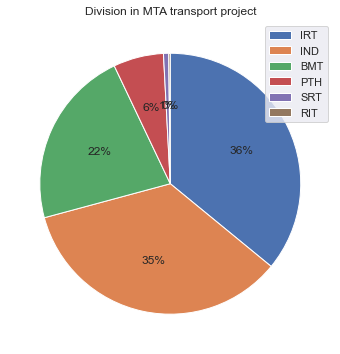

In [90]:
# Pie chart for each division
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = 6,6
sorted_counts = df['division'].value_counts()
plt.pie(sorted_counts, startangle = 90, counterclock = False, autopct='%.0f%%' );
plt.title('Division in MTA transport project');
plt.legend(sorted_counts.index);

##### The biggest division is IRT Interborough Rapid Transit Company

#### The most repeted stations in MTA data set

In [91]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 216
    s = 70
    l = int(100.0 * float(random_state.randint(50, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

In [92]:
text=" ".join(df["station"])

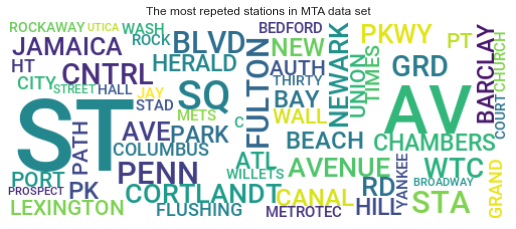

In [93]:
# Write the most reapted word in station column
plt.rcParams['figure.figsize'] =9, 4
wordcloud = WordCloud(font_path="Roboto-Medium.ttf",max_font_size=100, max_words=60, background_color="white",width=500, height=200,collocations=False).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("The most repeted stations in MTA data set")
plt.show();

##### The most reapeted station is ST

#### The number of weekly entreis in million
#### The busiest station with the weekly entries

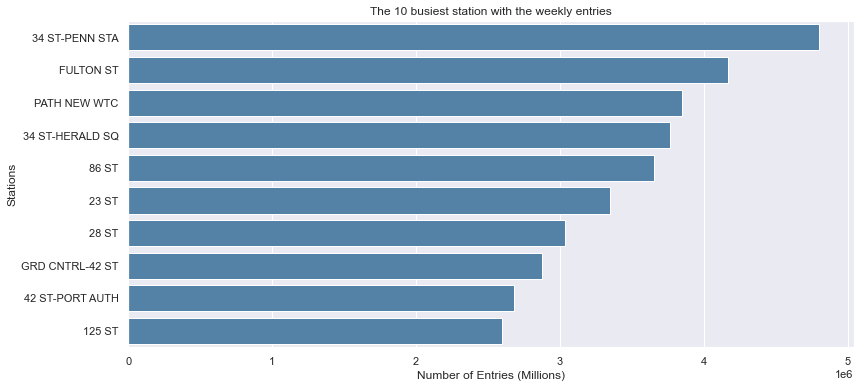

In [94]:
#The 10 busiest station with the weekly entries
plt.figure(figsize=(13,6))
sns.barplot(data=stations_daily_top10, x =station_totals_entries['daily_entries'][:10],y=station_totals_entries['station'][:10],color='steelblue')
plt.title('The 10 busiest station with the weekly entries')
plt.xlabel('Number of Entries (Millions)')
plt.ylabel('Stations');

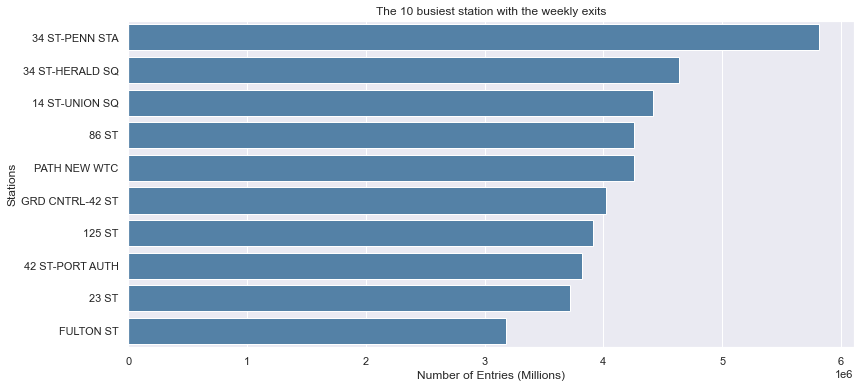

In [95]:
#The 10 busiest station with the weekly exits
plt.figure(figsize=(13,6))
sns.barplot(data=stations_daily_top10, x =station_totals_exits['daily_exits'][:10],y=station_totals_exits['station'][:10],color='steelblue')
plt.title('The 10 busiest station with the weekly exits')
plt.xlabel('Number of Entries (Millions)')
plt.ylabel('Stations');

##### The busiest station is 34-ST-PENNSTA

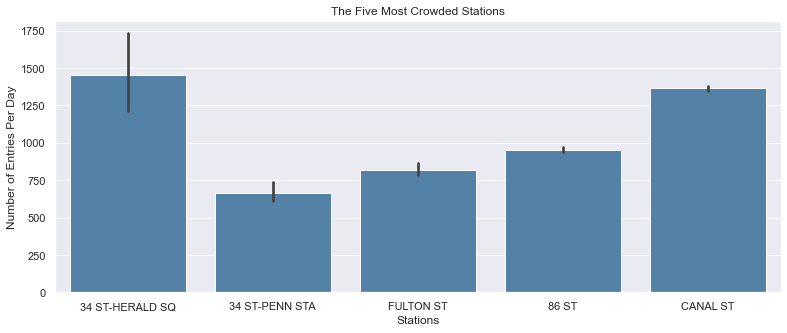

In [110]:
# The busiest station according to the traffic
plt.figure(figsize=(13,5))
sns.barplot(data=top5_stations, x='station',y='traffic',color='steelblue')
plt.xlabel('Stations')
plt.ylabel('Number of Entries Per Day')
plt.title('The Five Most Crowded Stations');

#### The busiest month

Text(0.5, 1.0, 'Rush months for the busiest station')

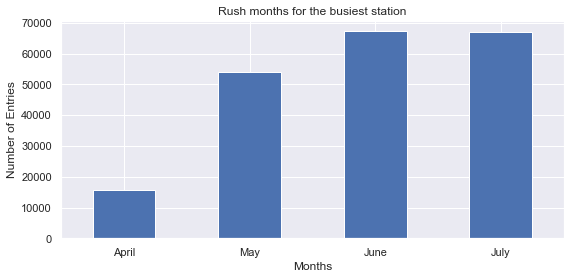

In [97]:
#Rush months for the busiest station

b.plot(kind='bar')
plt.xlabel('Months')
plt.ylabel('Number of Entries')
plt.xticks(rotation=0)
positions = (0, 1, 2,3)
labels = ("April", "May", "June",'July')
plt.xticks(positions, labels)
plt.title('Rush months for the busiest station')


#### The busiest months of the the busiest station are May and July

#### Rush hours

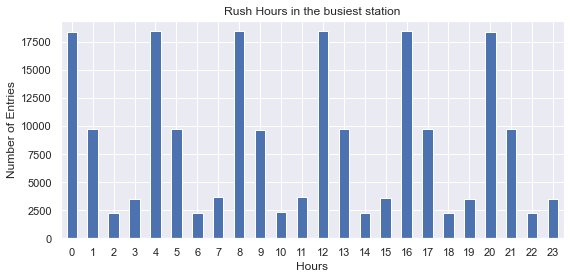

In [98]:
#Rush hours for the busiest station
a.reset_index(drop=True).plot(kind='bar')
plt.xlabel('Hours')
plt.ylabel('Number of Entries') 
plt.xticks(rotation=0)
plt.title('Rush Hours in the busiest station');

##### The peek hours are 12,4,8 AM
##### The peek hours are 12,4,8 PM

#### Busiest months

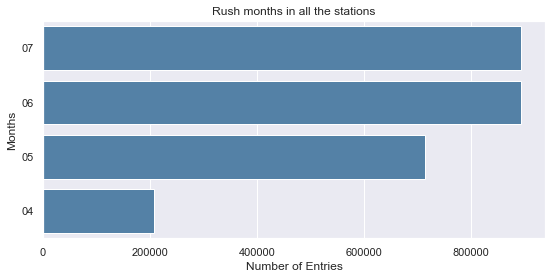

In [99]:
#Rush months for all the stations
plt.rcParams['figure.figsize'] =9, 4
sns.countplot(data=df, y='date_str',order = df['date_str'].value_counts().index,color='steelblue')
plt.xlabel('Number of Entries')
plt.ylabel('Months')
plt.title('Rush months in all the stations');

##### The busiest months are June and July of 2021

#### Connect with SQLalchemy

In [100]:
# Connect with a data base
engine = create_engine("sqlite:///D:/newDDB.db")
engine

Engine(sqlite:///D:/newDDB.db)

In [101]:
# Display the tables names in data base
all_tables = engine.table_names()
all_tables

['turnstile_210501']

#### Select all data from table

In [102]:
# Display all the data from table
MTAsql = pd.read_sql('SELECT * FROM turnstile_210501;', engine)
MTAsql

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,7561288,2582898
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,04:00:00,REGULAR,7561295,2582903
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,08:00:00,REGULAR,7561302,2582918
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,12:00:00,REGULAR,7561336,2582977
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,16:00:00,REGULAR,7561426,2583008
...,...,...,...,...,...,...,...,...,...,...,...
2930787,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/30/2021,05:00:00,REGULAR,5554,589
2930788,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/30/2021,09:00:00,REGULAR,5554,589
2930789,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/30/2021,13:00:00,REGULAR,5554,589
2930790,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/30/2021,17:00:00,REGULAR,5554,590


#### Select all the data from table for each station oreder by number of entries

In [103]:
# Display all the data from table for each station oreder by entries in ascending
pd.read_sql('SELECT * FROM turnstile_210501 group by STATION order by count(ENTRIES);', engine)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,J022,R435,00-00-00,CLEVELAND ST,J,BMT,04/24/2021,01:00:00,REGULAR,5239949,5914295
1,H037,R349,00-00-00,SUTTER AV,L,BMT,04/24/2021,01:00:00,REGULAR,2529643,2935088
2,OB01,R459,00-00-00,ORCHARD BEACH,6,IND,05/21/2021,09:04:53,REGULAR,401646,24779
3,N215,R237,00-00-00,182-183 STS,BD,IND,04/24/2021,00:00:00,REGULAR,14405519,6764457
4,J020,R433,00-00-00,ALABAMA AV,J,BMT,04/24/2021,01:00:00,REGULAR,2186127,1717993
...,...,...,...,...,...,...,...,...,...,...,...
374,C025,R215,00-00-00,86 ST,R,BMT,04/24/2021,00:00:00,REGULAR,382302,525156
375,A030,R083,01-00-00,23 ST,NRW,BMT,04/24/2021,00:00:00,REGULAR,77996,87272
376,R235,R045,01-00-00,GRD CNTRL-42 ST,4567S,IRT,04/24/2021,01:00:00,REGULAR,69,341
377,A077,R028,03-00-00,FULTON ST,ACJZ2345,BMT,04/24/2021,03:00:00,REGULAR,414239,126787


In [104]:
# Select DIVISION and LINENAME from table for each DIVISION
pd.read_sql('SELECT DIVISION,LINENAME FROM turnstile_210501 group by DIVISION;', engine)

,DIVISION,LINENAME
0,BMT,NQR456W
1,IND,A
2,IRT,1RW
3,PTH,1
4,RIT,R
5,SRT,1


In [105]:
# Select STATION,DATE,TIME from table for each DIVISION
pd.read_sql('SELECT STATION,DATE,TIME FROM turnstile_210501 group by DIVISION;', engine)

,STATION,DATE,TIME
0,59 ST,04/24/2021,00:00:00
1,HOWARD BCH JFK,04/24/2021,01:00:00
2,SOUTH FERRY,04/24/2021,01:00:00
3,NEWARK HW BMEBE,04/24/2021,02:51:28
4,RIT-MANHATTAN,04/24/2021,01:00:00
5,ST. GEORGE,04/24/2021,00:00:00


### Final recomendation

#### Expand the busiest stations as a short term solution

#### Add new stations new to the busiest stations as a long term solution